In [40]:

from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style("dark")
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['indices', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Let us Load the Data sets Kaggle MINST



In [41]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')
y = train_data["label"]
x = train_data.drop("label",1)


Let us do some EDA

In [42]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


42000 Entries, 704 features, Wow a lot of training data, so training would take some time without PCA.
Let's see how much time we save!

Plot some of the MINST Numbers 

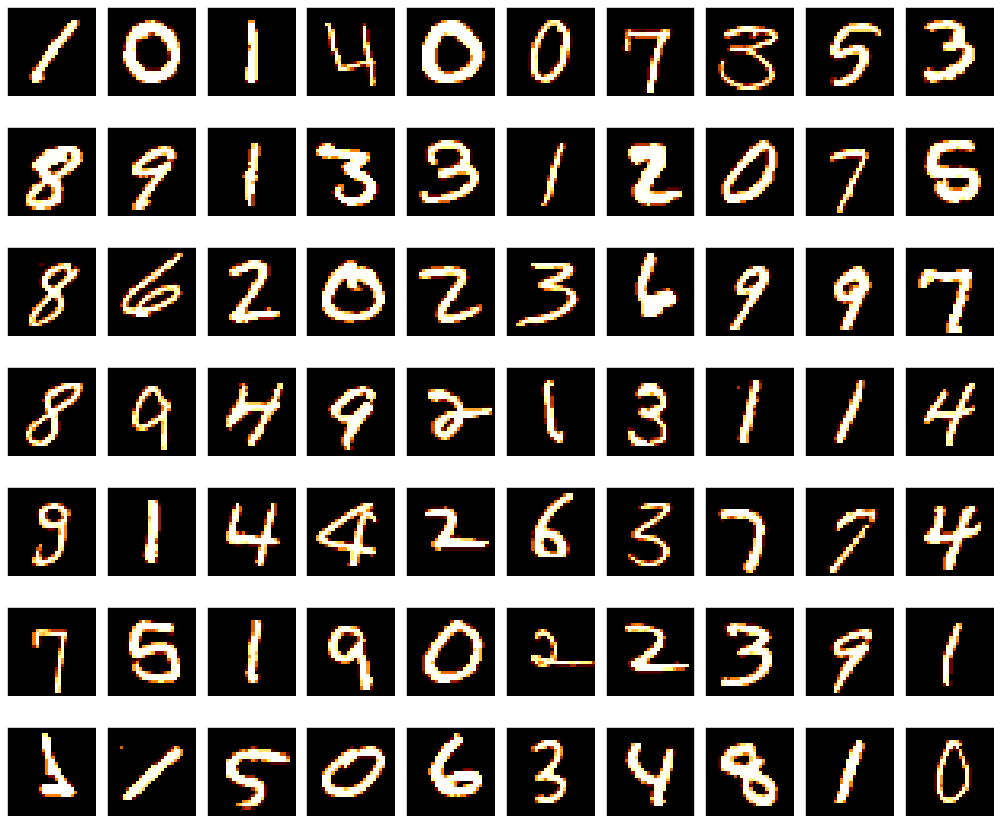

In [18]:
# plot some of the numbers
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = x.iloc[digit_num].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

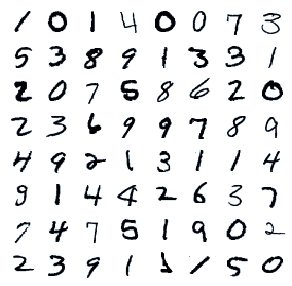

In [45]:

figure(figsize(5,5))
for digit_num in range(0,64):
    subplot(8,8,digit_num+1)
    grid_data = x.iloc[digit_num].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    xticks([])
    yticks([])
    

In [46]:
from sklearn.ensemble import RandomForestClassifier
import datetime as dt

random_st = 1234
forest_clf = RandomForestClassifier(n_estimators=80, random_state=random_st)

# Split Scaled data into Train and Test sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_st)

start_time = dt.datetime.now()

forest_clf.fit(x_train, y_train)

end_time = dt.datetime.now()

print( "Time Taken: %s", (end_time-start_time) )

print( "Score: %s", forest_clf.score(x_test,y_test) )





Time Taken: %s 0:00:15.274242
Score: %s 0.960952380952381


Feature ranking:
1. feature 378 (0.011224)
2. feature 405 (0.009033)
3. feature 409 (0.008408)
4. feature 347 (0.007572)
5. feature 350 (0.007519)
6. feature 377 (0.007516)
7. feature 154 (0.007438)
8. feature 489 (0.007245)
9. feature 381 (0.007221)
10. feature 211 (0.007082)


Text(0, 0.5, 'importance')

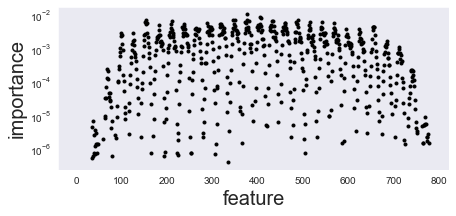

In [47]:
importances = forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(0,10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances

figure(figsize(7,3))
plot(indices[:],importances[indices[:]],'k.')
yscale("log")
xlabel("feature",size=20)
ylabel("importance",size=20)

In [48]:
# Run this classifier against Kaggle real world "test" data
# sample_submission.csv 
# Submit the results to Kaggle
# Get the screen shot of Kaggle score

In [49]:

#test_poly = poly.fit_transform(test_scaled)

pred = forest_clf.predict(test_data)
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = pred
print( submission.head() )
submission.to_csv('submission_rf.csv', index=False)
print("Submission successful")



   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
Submission successful


We will do PCA now as instructed in the assignment and record the Time

In [50]:
# PCA on both Train and Test, not a good idea !
# We should do PCA fit on train data set and then use the transform on test data set

# PCA fature set capturing 95% variances
start_time = dt.datetime.now()
pca = PCA(n_components=0.95)
pca.fit(x)
x_pca = pca.transform(x)
end_time = dt.datetime.now()
print( "Time Taken for PCA only: %s", (end_time-start_time) )

#pca.explained_variance_ratio_
print("let's see how many feature we have after PCA")
x_pca.shape

Time Taken for PCA only: %s 0:00:04.427147
let's see how many feature we have after PCA


(42000, 154)

In [51]:
pca.explained_variance_ratio_

array([0.09748938, 0.07160266, 0.06145903, 0.05379302, 0.04894262,
       0.04303214, 0.03277051, 0.02892103, 0.02766902, 0.02348871,
       0.02099325, 0.02059001, 0.01702553, 0.01692787, 0.01581126,
       0.0148324 , 0.01319688, 0.01282727, 0.01187976, 0.01152755,
       0.01072191, 0.01015199, 0.00964902, 0.00912846, 0.00887641,
       0.00838766, 0.00811856, 0.00777406, 0.00740635, 0.00686661,
       0.00657982, 0.00638799, 0.00599367, 0.00588913, 0.00564335,
       0.00540967, 0.00509222, 0.00487505, 0.00475569, 0.00466545,
       0.00452952, 0.00444989, 0.00418255, 0.00397506, 0.00384542,
       0.00374919, 0.00361013, 0.00348522, 0.00336488, 0.00320738,
       0.00315467, 0.00309146, 0.00293709, 0.00286541, 0.00280759,
       0.00269618, 0.00265831, 0.00256299, 0.00253821, 0.00246178,
       0.00239716, 0.0023874 , 0.00227591, 0.00221518, 0.00213934,
       0.00206133, 0.00202851, 0.00195977, 0.00193639, 0.00188485,
       0.00186751, 0.0018167 , 0.00176891, 0.00172592, 0.00166

As we can see PCA too around 4 seconds, and it reduced the featureset to 154 from 784 
It's wuite impressive feature reduction.
Let's see how much time it takes for training.

In [52]:
from sklearn.ensemble import RandomForestClassifier
import datetime as dt

forest_clf = RandomForestClassifier(n_estimators=80, random_state=random_st)


# Split data into Train and Test sets 
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=random_st)

start_time = dt.datetime.now()

forest_clf.fit(x_train, y_train)

end_time = dt.datetime.now()

print( "Time Taken after PCA reduction: %s", (end_time-start_time) )

print( "Score: %s", forest_clf.score(x_test,y_test) )

Time Taken after PCA reduction: %s 0:00:35.868515
Score: %s 0.9389285714285714


Run this classifier against Kaggle real world "test" data
sample_submission.csv 
Submit the results to Kaggle
Get the screen shot of Kaggle score

In [53]:

test_pca = pca.transform(test_data)

pred = forest_clf.predict(test_pca)
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = pred
print( submission.head() )
submission.to_csv('submission_rf_pca.csv', index=False)
print("Submission successful")

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      4
4        5      2
Submission successful


In [138]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

k = 10

x_norm = x.astype(float) / 255.

# Split data into Train and Test sets 
#x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=random_st)


kmeans = MiniBatchKMeans(n_clusters = k)
# Fit the model to the training data
kmeans.fit(x_norm)
kmeans.labels_



array([7, 2, 6, ..., 3, 4, 0], dtype=int32)

In [139]:
kmeans.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
kmeans.predict(x_test)

array([8, 9, 6, ..., 3, 3, 8], dtype=int32)

In [141]:
kmeans.n_clusters

10

In [142]:
# These are Cluster labels, let's assign Digits
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        # find index of points in cluster
        #labels = []
        labels = list()
        index = np.where(kmeans.labels_ == i)
        # append actual labels for each point in cluster
        for val in index:
            #labels.append(actual_labels[index])
            labels.append(actual_labels[val])
        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels




In [109]:
    for i in range(kmeans.n_clusters):
        # find index of points in cluster
        #labels = []
        labels = list()
        #print( i )
        index = np.where(kmeans.labels_ == i)
        # append actual labels for each point in cluster
        #labels.append(y[index])
        #print( "Index:", index)
        #print("Y-Index", y[index[0]])
        for val in index:
            print(y[val])
            labels.append(y[index[0]])
        
        

7        3
36       3
37       1
39       4
56       2
        ..
33550    9
33555    9
33564    9
33580    3
33588    3
Name: label, Length: 3189, dtype: int64
0        1
11       9
23       0
25       3
28       9
        ..
33547    1
33549    3
33560    6
33567    7
33579    0
Name: label, Length: 5078, dtype: int64
17       0
44       2
48       7
50       7
63       0
        ..
33592    8
33593    5
33595    6
33596    0
33597    0
Name: label, Length: 4700, dtype: int64
19       5
43       4
47       7
66       4
72       6
        ..
33438    1
33488    2
33511    6
33531    3
33578    1
Name: label, Length: 2834, dtype: int64
9        3
21       6
52       1
64       6
67       8
        ..
33556    6
33558    2
33571    1
33576    3
33581    5
Name: label, Length: 2633, dtype: int64
49       4
93       6
103      7
116      7
148      4
        ..
33554    0
33559    2
33577    8
33586    7
33594    9
Name: label, Length: 2441, dtype: int64
1        0
2        1
12       1
2

In [143]:
cluster_labels = infer_cluster_labels(kmeans, y)
cluster_labels

{4: [0], 8: [1, 5], 0: [2], 7: [3], 6: [4], 1: [6, 7], 5: [8], 3: [9]}

In [144]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, y)
x_clusters = kmeans.predict(x_test)

predicted_labels = infer_data_labels(x_clusters, cluster_labels)


In [145]:
test_data_norm = test_data.astype(float) / 255.

pred = kmeans.predict(test_data_norm)
predicted_labels = infer_data_labels(pred, cluster_labels)


submission = pd.read_csv('sample_submission.csv')
submission['Label'] = predicted_labels
print( submission.head() )
submission.to_csv('submission_kmeans.csv', index=False)
print("Submission successful")

   ImageId  Label
0        1      6
1        2      0
2        3      8
3        4      7
4        5      3
Submission successful


# PCA Design Flaw
The PCA is dimenion reduction technique which uses Sigle Value Decompsition (SVD) and  eigen vectors and eigen values to choose the optimal feature set that captures the highest variance in the Training data.
In our design we have ran PCA on both Training and Test data combined, it used eigen vectors and values from train and test data. This is a flaw as now our training data is projected using test data as well. Here test data is also used to learn a representation of the training data, which is not a good practice.

The below is the correct way to perform PCA tranformation

pca = PCA(n_components=0.95)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)


In [146]:


# Split Scaled data into Train and Test sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_st)

pca = PCA(n_components=0.95)

pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

forest_clf = RandomForestClassifier(n_estimators=80, random_state=random_st)


start_time = dt.datetime.now()

forest_clf.fit(x_train_pca, y_train)

end_time = dt.datetime.now()

print( "Time Taken after PCA reduction: %s", (end_time-start_time) )

print( "Score: %s", forest_clf.score(x_test_pca,y_test) )



Time Taken after PCA reduction: %s 0:00:36.175423
Score: %s 0.9354761904761905


In [147]:
test_pca = pca.transform(test_data)

pred = forest_clf.predict(test_pca)
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = pred
print( submission.head() )
submission.to_csv('submission_rf_pca_updated.csv', index=False)
print("Submission successful")

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      4
4        5      3
Submission successful


In this Digit Classification Analysis we used Random Forrest Classifier without PCA, Random Forrest with PCA reduction, 
and K-Means clustering. There was a design flaw in PCA tranformation, and after fixing it the Kaggle submission score 
improved a little. The best score we got was without the PCA reduction, when all the features were used though. 
I felt since this is a Classification problem with labelled training data, perhaps K-means is not the best model here, 
the clster label inference seems to be not very accurate.

